In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)

In [2]:
price_data = pd.read_excel(r'dataPrep.xlsx',sheetname="price_data")
vol_data = pd.read_excel(r'dataPrep.xlsx',sheetname="volume_data")
tesco_data = pd.read_excel(r'dataPrep.xlsx',sheetname="tesso_data")

In [5]:
price_data.columns = ['PBL', 'Site', 'SiteMatchingCode', 'Date', 'Grade', 'CRUSO_price']
#vol_data['Attribute'] = vol_data['Attribute'].str.replace('UL 96','UL 95')
vol_data['Attribute'] = vol_data['Attribute'].str.replace(" ","")
price_data['Grade'] = price_data['Grade'].str.replace(" ","")
tesco_data = tesco_data.loc[:,tesco_data.columns[:-3]]

In [7]:
vol_data.to_pickle('vol_data.pkl')
price_data.to_pickle('price_data.pkl')
#df_merge.to_pickle('vol_data.pkl')

In [14]:
price_data.dropna(inplace=True)
vol_data.dropna(inplace=True)

In [33]:
df_merge = pd.merge(price_data,vol_data,
                    left_on=['SiteMatchingCode','Date','Grade'],
                    right_on=['SiteMatchingCode','Date','Attribute'],
                    how='left')

In [17]:
df_merge.columns

Index(['PBL_x', 'Site_x', 'SiteMatchingCode', 'Date', 'Grade', 'CRUSO_price',
       'PBL_y', 'Site_y', 'SiteName', 'Attribute', 'volume'],
      dtype='object')

In [34]:
df_merge.isnull().sum()

PBL_x                  0
Site_x                 0
SiteMatchingCode       0
Date                   0
Grade                  0
CRUSO_price            0
PBL_y               2131
Site_y              2131
SiteName            2131
Attribute           2131
volume              2131
dtype: int64

In [35]:
df_merge.dropna(inplace=True)

In [36]:
df_merge = df_merge.loc[:,['PBL_x', 'Site_x', 'SiteMatchingCode', 'Date',\
                           'Grade', 'CRUSO_price','volume']]

df_merge.columns = ['PBL', 'Site', 'SiteMatchingCode', 'Date',\
                           'Grade', 'CRUSO_price','volume']

df_merge['sales_val'] = df_merge['CRUSO_price']*df_merge['volume']

In [37]:
df_merge.isnull().sum()

PBL                 0
Site                0
SiteMatchingCode    0
Date                0
Grade               0
CRUSO_price         0
volume              0
sales_val           0
dtype: int64

In [38]:
df_merge.head()

PBL                              Site SiteMatchingCode       Date  \
0 200,740.00  TESCO ABINGTON EXPRESS (RT) FUEL           CRUSO1 2019-01-01   
1 200,740.00  TESCO ABINGTON EXPRESS (RT) FUEL           CRUSO1 2019-01-01   
2 200,740.00  TESCO ABINGTON EXPRESS (RT) FUEL           CRUSO1 2019-01-02   
3 200,740.00  TESCO ABINGTON EXPRESS (RT) FUEL           CRUSO1 2019-01-02   
4 200,740.00  TESCO ABINGTON EXPRESS (RT) FUEL           CRUSO1 2019-01-03   

  Grade  CRUSO_price   volume  sales_val  
0  UL95       126.90 3,246.00 411,917.15  
1   ADO       129.90 3,949.00 512,975.11  
2  UL95       124.77 5,944.00 741,603.76  
3   ADO       129.90 7,355.00 955,414.30  
4  UL95       122.90 5,749.00 706,552.41

In [47]:
#tesco_data = pd.read_excel(r'dataPrep.xlsx',sheetname="tesso_data")
# tesco_data.head()
#tesco_data.columns
#tesco_data = tesco_data.loc[:,tesco_data.columns[:-3]]

Index(['Site Name', 'SiteMatchingCode', 'SiteExtrct', 'Transaction Date',
       'key', 'Total Sales Value', 'Total Baskets', 'Sales Baskets With Fuel',
       'Baskets With Fuel', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

In [39]:
df3 = df_merge.pivot_table(index=['Site','SiteMatchingCode','Date'],
                 columns = 'Grade',
                 values=['CRUSO_price','volume','sales_val']
                ).reset_index()

df3.columns = [''.join(col).strip() for col in df3.columns.values]

In [52]:
df3.head()

Site SiteMatchingCode       Date  CRUSO_priceADO  \
0  DALHOUSIE ROAD EXPRESS          CRUSO57 2019-01-01          128.90   
1  DALHOUSIE ROAD EXPRESS          CRUSO57 2019-01-02          128.90   
2  DALHOUSIE ROAD EXPRESS          CRUSO57 2019-01-03          128.90   
3  DALHOUSIE ROAD EXPRESS          CRUSO57 2019-01-04          128.90   
4  DALHOUSIE ROAD EXPRESS          CRUSO57 2019-01-05          128.90   

   CRUSO_priceUL95  volumeADO  volumeUL95  sales_valADO  sales_valUL95  
0           117.90   1,429.00    1,729.00    184,198.11     203,848.75  
1           117.90   5,042.00    5,423.00    649,914.00     639,371.42  
2           118.48   5,343.00    6,922.00    688,712.56     820,109.84  
3           118.21   5,650.00    7,134.00    728,284.58     843,302.72  
4           117.90   5,682.00    6,385.00    732,410.00     752,791.80

In [54]:
tesco_data_2 = pd.merge(tesco_data,df3,
                        left_on=['SiteMatchingCode','Transaction Date'],
                        right_on=['SiteMatchingCode','Date'],
                        how='left')

In [55]:
tesco_data_2.isnull().sum()

Site Name                     0
SiteMatchingCode              0
SiteExtrct                    0
Transaction Date              0
key                           0
Total Sales Value             0
Total Baskets                 0
Sales Baskets With Fuel       0
Baskets With Fuel             0
Site                       8329
Date                       8329
CRUSO_priceADO             8407
CRUSO_priceUL95            8367
volumeADO                  8407
volumeUL95                 8367
sales_valADO               8407
sales_valUL95              8367
dtype: int64

In [56]:
tesco_data_2.shape

(73595, 17)

In [60]:
tesco_data_2.head(5)

Site Name SiteMatchingCode SiteExtrct Transaction Date  \
0  PITTODRIE EXPRESS         CRUSO143  PITTODRIE       2019-02-25   
1  PITTODRIE EXPRESS         CRUSO143  PITTODRIE       2019-02-26   
2  PITTODRIE EXPRESS         CRUSO143  PITTODRIE       2019-02-27   
3  PITTODRIE EXPRESS         CRUSO143  PITTODRIE       2019-02-28   
4  PITTODRIE EXPRESS         CRUSO143  PITTODRIE       2019-03-01   

               key  Total Sales Value  Total Baskets  Sales Baskets With Fuel  \
0  PITTODRIE-43521          27,700.09           2975                12,847.84   
1  PITTODRIE-43522          28,443.54           3020                13,243.61   
2  PITTODRIE-43523          31,052.50           3212                15,077.19   
3  PITTODRIE-43524          29,484.72           2965                15,181.61   
4  PITTODRIE-43525          32,571.31           2899                16,681.80   

   Baskets With Fuel                               Site       Date  \
0                358  TESCO PITTODRIE EXPRESS (RT) FUEL 2019-02-25   
1                367  TESCO PITTODRIE EXPRESS (RT) FUEL 2019-02-26   
2                414  TESCO PITTODRIE EXPRESS (RT) FUEL 2019-02-27   
3                442  TESCO PITTODRIE EXPRESS (RT) FUEL 2019-02-28   
4                459  TESCO PITTODRIE EXPRESS (RT) FUEL 2019-03-01   

   CRUSO_priceADO  CRUSO_priceUL95  volumeADO  volumeUL95  sales_valADO  \
0          127.90           117.90   5,282.00    4,314.00    675,567.94   
1          127.90           117.90   6,046.00    3,964.00    773,283.17   
2          127.90           117.90   6,343.00    5,035.00    811,269.99   
3          127.90           117.90   6,177.00    5,179.00    790,038.37   
4          127.90           117.90   7,050.00    5,446.00    901,695.37   

   sales_valUL95  
0     508,621.19  
1     467,355.90  
2     593,626.65  
3     610,604.26  
4     642,083.81

In [62]:
tesco_data_2['totalSalesEsso'] = tesco_data_2.sales_valADO + tesco_data_2.sales_valUL95

In [63]:
tesco_data_2.columns

Index(['Site Name', 'SiteMatchingCode', 'SiteExtrct', 'Transaction Date',
       'key', 'Total Sales Value', 'Total Baskets', 'Sales Baskets With Fuel',
       'Baskets With Fuel', 'Site', 'Date', 'CRUSO_priceADO',
       'CRUSO_priceUL95', 'volumeADO', 'volumeUL95', 'sales_valADO',
       'sales_valUL95', 'totalSalesEsso'],
      dtype='object')

In [70]:
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

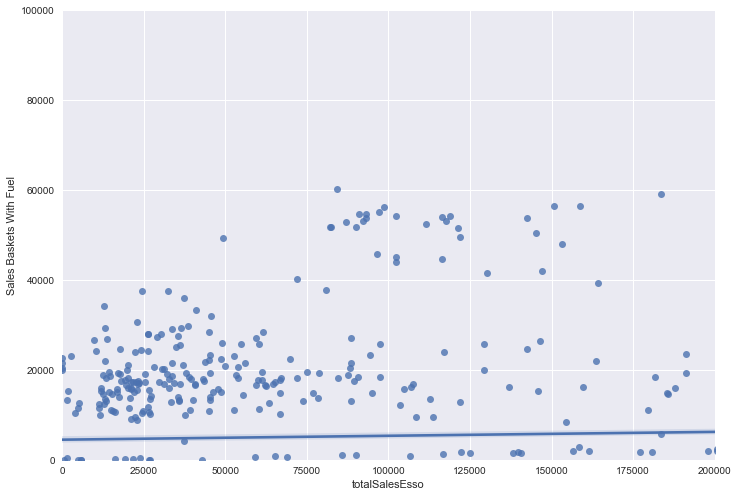

In [74]:
#ax = sns.scatterplot(x="totalSalesEsso", y="Sales Baskets With Fuel", data=tesco_data_2)

ax = sns.regplot(x="totalSalesEsso", y="Sales Baskets With Fuel", data=tesco_data_2).set(xlim=(0,200000),ylim=(0,100000))
plt.show(ax)

In [75]:
tesco_data_2.loc[:,["totalSalesEsso","Sales Baskets With Fuel"]].describe()

totalSalesEsso  Sales Baskets With Fuel
count       65,150.00                73,595.00
mean     1,742,260.27                19,447.55
std        642,183.52                 6,394.70
min     -4,179,454.96                     0.00
25%      1,366,355.99                15,477.24
50%      1,653,242.96                18,651.48
75%      2,026,312.36                22,624.03
max     25,383,780.01                64,937.62

In [76]:
tesco_data_2["totalSalesEsso_2"] = tesco_data_2["totalSalesEsso"]*0.01

In [74]:
# site_price_list = df3.Site.unique().tolist()
# tesco_sites = tesco_data.Site.unique().tolist()
# len(set(site_price_list)-set(tesco_sites))
# len(site_price_list)
# len(tesco_sites)
# len(set(tesco_sites)-set(site_price_list))

In [77]:
tesco_data_2.loc[:,["totalSalesEsso_2","Sales Baskets With Fuel"]].describe()

totalSalesEsso_2  Sales Baskets With Fuel
count         65,150.00                73,595.00
mean          17,422.60                19,447.55
std            6,421.84                 6,394.70
min          -41,794.55                     0.00
25%           13,663.56                15,477.24
50%           16,532.43                18,651.48
75%           20,263.12                22,624.03
max          253,837.80                64,937.62

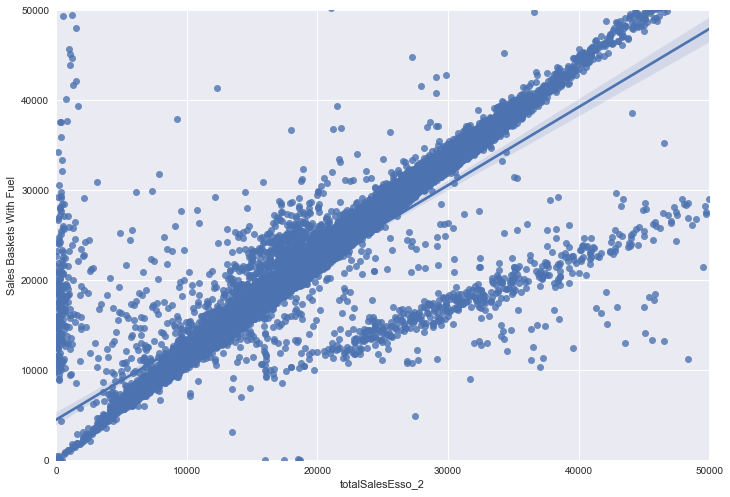

In [78]:
ax = sns.regplot(x="totalSalesEsso_2", y="Sales Baskets With Fuel",\
                 data=tesco_data_2).set(xlim=(0,50000),ylim=(0,50000))
plt.show(ax)